In [930]:
import pandas as pd
import numpy as np

import math
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split , GridSearchCV

In [931]:
import gc

import warnings
warnings.filterwarnings("ignore")


In [932]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,max_error,r2_score,median_absolute_error
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_regression
from sklearn.preprocessing import MinMaxScaler,normalize
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [933]:
bdf=pd.read_csv("C:/Users/nikhi/Desktop/High radius/H2HBABBA2884.csv")

In [934]:
bdf.head(6)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200230690,DECA foundation,2020-03-02 00:00:00,2020.0,1.930544e+09,2020-02-19,20200219,20200219,20200310.0,USD,RV,1.0,NaN,824.52,20200216.0,NAM4,1.930544e+09,0
1,U001,0200744019,TARG associates,NaN,2020.0,1.930690e+09,2020-03-25,20200324,20200325,20200409.0,USD,RV,1.0,NaN,28228.92,20200325.0,NAA8,1.930690e+09,1
2,U001,0200790107,ROU corporation,2019-10-23 00:00:00,2019.0,1.929760e+09,2019-08-19,20190819,20190819,20191023.0,USD,RV,1.0,NaN,2855.14,20190819.0,NAGD,1.929760e+09,0
3,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930826e+09,2020-04-24,20200424,20200424,20200509.0,USD,RV,1.0,NaN,3916.36,20200424.0,NAH4,1.930826e+09,1
4,CA02,0100031970,CAPITAL co,2019-03-28 00:00:00,2019.0,2.960533e+09,2019-03-08,20190309,20190308,20190324.0,CAD,RV,1.0,NaN,7466.94,20190314.0,CA10,2.960533e+09,0
5,U001,0200769623,WAL-MAR trust,2020-01-30 00:00:00,2020.0,1.930411e+09,2020-01-19,20200117,20200119,20200203.0,USD,RV,1.0,NaN,1322.22,20200119.0,NAH4,1.930411e+09,0


In [935]:
bdf.shape

(50000, 19)

In [936]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [937]:
bdf.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999500e+04,50000.000000
mean,2019.305760,2.011935e+09,2.019350e+07,2.019353e+07,2.019368e+07,1.0,NaN,32551.137327,2.019353e+07,2.011186e+09,0.200000
std,0.460733,2.862869e+08,4.495529e+03,4.481070e+03,4.470195e+03,0.0,NaN,39650.285027,4.482395e+03,2.763332e+08,0.400004
min,2019.000000,1.928509e+09,2.018123e+07,2.018123e+07,2.018123e+07,1.0,NaN,0.720000,2.018121e+07,1.928509e+09,0.000000
25%,2019.000000,1.929349e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4874.350000,2.019051e+07,1.929348e+09,0.000000
50%,2019.000000,1.929968e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17446.420000,2.019091e+07,1.929968e+09,0.000000
75%,2020.000000,1.930623e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47554.810000,2.020013e+07,1.930623e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,773749.440000,2.020052e+07,2.960635e+09,1.000000


In [938]:
to_cnt = bdf.nunique().to_frame(name = 'Count')
to_cnt

,Count
business_code,6
cust_number,1428
name_customer,4214
clear_date,395
buisness_year,2
doc_id,48797
posting_date,502
document_create_date,504
document_create_date.1,502
due_in_date,545


In [939]:
#removing nulls - counting nulls
nulls = bdf.isna().sum().to_frame(name = 'NULL COUNT')
nulls = nulls[nulls['NULL COUNT']>0]
null_features = nulls.index
nulls

,NULL COUNT
clear_date,10000
area_business,50000
invoice_id,5


In [940]:
bdf=bdf.drop(columns=['area_business'])
bdf.shape

(50000, 18)

In [941]:
test = bdf[bdf['clear_date'].isnull() == True]   #creating test data 
bdf = bdf.dropna()
bdf.shape

(39995, 18)

In [942]:
test.shape


(10000, 18)

In [943]:
bdf.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

In [945]:
bdf.duplicated().sum()

896

In [946]:
data_transpose = bdf.T   #taking transpose to find the duplicated columns
data_transpose.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
document type             False
posting_id                False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
isOpen                    False
dtype: bool

In [947]:
test_transpose = test.T
test_transpose.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
document type             False
posting_id                False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
isOpen                     True
dtype: bool

In [948]:
test.duplicated().sum()

307

In [950]:
(bdf['doc_id'] != bdf['invoice_id']).sum()  #proves both columns are same

0

In [951]:
bdf = bdf.drop(columns=['doc_id'])     #dropping doc id

In [952]:
(test['doc_id'] != test['invoice_id']).sum() 

0

In [953]:
test = test.drop(columns=['doc_id'])

In [956]:
bdf = bdf.drop(columns = 'invoice_id')  #removing colums uniques to each row
test = test.drop(columns = 'invoice_id')

In [957]:
bdf = bdf.drop(columns = 'document type')  #removing constant features
test = test.drop(columns = 'document type')

In [958]:
const_feature = []                 #finding extra const features
uniq_val_count = []
unique_cols = dict()
for col in list(bdf.columns):
    uniq_val_count.append(bdf[col].nunique())
    if(bdf[col].nunique()==1):
        const_feature.append(col)




Constant Features are   : ['posting_id', 'isOpen']


ALL FEATURES WITH UNIQUE VALUES : 



,COLUMN NAMES,UNIQUE VALUES COUNT
0,business_code,6
1,cust_number,1343
2,name_customer,3938
3,clear_date,395
4,buisness_year,2
5,posting_date,422
6,document_create_date,425
7,document_create_date.1,422
8,due_in_date,493
9,invoice_currency,2


In [959]:
# Removing the constant feature
cnst_feature=['posting_id', 'isOpen']
bdf=bdf.drop(columns=const_feature)

# Removing the constant feature
test=test.drop(columns=const_feature)

In [960]:
bdf.shape

(39995, 13)

In [961]:
#applying label encoder for object based data
class label_encoding(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])  #fit the data to unknown 
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

In [962]:
list_cust_details = ['buisness_year','cust_number','business_code','cust_payment_terms']  #normalizing these columns to numerical

label_enc_list = dict()
for col in range(len(list_cust_details)):
    label_encoder = label_encoding()
    label_encoder.fit(bdf[list_cust_details[col]])
    bdf[list_cust_details[col]] = label_encoder.transform(bdf[list_cust_details[col]])
    label_enc_list[list_cust_details[col]]=label_encoder

In [963]:
bdf1=bdf  

In [964]:
bdf = bdf.drop(columns = ['name_customer', 'posting_date','document_create_date']) #constant features removal not required

In [967]:
for col in range(len(list_cust_details)):   #transforming list of customer data
    test[list_cust_details[col]] = label_enc_list[list_cust_details[col]].transform(test[list_cust_details[col]])

In [968]:
#converting all str date to proper date format
#training data

bdf['due_in_date'] = pd.Series(bdf['due_in_date']).map(lambda x: str(int(x)) )

bdf['due_in_date']=pd.to_datetime(bdf['due_in_date'],format='%Y-%m-%d')

bdf['clear_date'] = pd.Series(bdf['clear_date']).map(lambda x: str(x) )

bdf['clear_date'] = pd.Series(bdf['clear_date']).map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S') )

bdf['baseline_create_date'] = pd.Series(bdf['baseline_create_date']).map(lambda x: str(int(x)) )

bdf['baseline_create_date']=pd.to_datetime(bdf['baseline_create_date'],format='%Y-%m-%d')

#bdf['document_create_date'] = pd.Series(bdf['document_create_date']).map(lambda x: str(int(x)) )

#bdf['document_create_date']=pd.to_datetime(bdf['document_create_date'],format='%Y-%m-%d')

bdf['document_create_date.1'] = pd.Series(bdf['document_create_date.1']).map(lambda x: str(int(x)) )

bdf['document_create_date.1']=pd.to_datetime(bdf['document_create_date.1'],format='%Y-%m-%d') 

#test data
test['baseline_create_date'] = pd.Series(test['baseline_create_date']).map(lambda x: str(int(x)) )

test['baseline_create_date']=pd.to_datetime(test['baseline_create_date'],format='%Y-%m-%d')

test['document_create_date'] = pd.Series(test['document_create_date']).map(lambda x: str(int(x)) )

test['document_create_date']=pd.to_datetime(test['document_create_date'],format='%Y-%m-%d')

test['document_create_date.1'] = pd.Series(test['document_create_date.1']).map(lambda x: str(int(x)) )

test['document_create_date.1']=pd.to_datetime(test['document_create_date.1'],format='%Y-%m-%d')

test['due_in_date'] = pd.Series(test['due_in_date']).map(lambda x: str(int(x)) )

test['due_in_date']=pd.to_datetime(test['due_in_date'],format='%Y-%m-%d')


In [969]:
dt_lis = ['baseline_create_date','clear_date','due_in_date','document_create_date.1']
bdf.columns

Index(['business_code', 'cust_number', 'clear_date', 'buisness_year',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms'],
      dtype='object')

In [970]:
selection = VarianceThreshold(threshold=0.01) # if more that 99% values are same -> column gets removed

cols = list(set(bdf.columns) - (set(dt_lis) | set(['invoice_currency'])))

selection.fit(bdf[cols])

print("No. of Quasi-features : ",(len(cols) - sum(selection.get_support())))

quasi_ = list(selection.get_support())

for i in range(len(quasi_)):
    if quasi_[i] == False:
        print("The Quasi-features in training dataset :",cols[i])
        bdf=bdf.drop(columns=[cols[i]])

for i in range(len(quasi_)):
    if quasi_[i] == False:
        print("The Quasi-features in testing dataset:",cols[i])
        test=test.drop(columns=[cols[i]])

No. of Quasi-Constant :  1
The Quasi-Constant in train : buisness_year
The Quasi-Constant in test: buisness_year


In [971]:
bdf = bdf.drop(columns = ['document_create_date.1'])  #dropping column since of 

In [972]:
test = test.drop(columns = ['document_create_date.1'])

In [973]:
dates_list = ['due_in_date','baseline_create_date'] 

In [974]:
bdf.columns

Index(['business_code', 'cust_number', 'clear_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

In [975]:
bdf['payment_term']=pd.Series(bdf['clear_date'] - bdf['baseline_create_date']).dt.days  #total days alloted

In [976]:
bdf['due_term']=pd.Series(bdf['due_in_date'] - bdf['baseline_create_date']).dt.days     #days till dude

In [977]:
bdf['delay'] = bdf['payment_term'] - bdf['due_term']                        #if not payed ,delayed date!

In [978]:
test['due_term']=pd.Series(test['due_in_date'] - test['baseline_create_date']).dt.days  #for test dataset

In [979]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 49996
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         10000 non-null  int64         
 1   cust_number           10000 non-null  int64         
 2   name_customer         10000 non-null  object        
 3   clear_date            0 non-null      object        
 4   posting_date          10000 non-null  object        
 5   document_create_date  10000 non-null  datetime64[ns]
 6   due_in_date           10000 non-null  datetime64[ns]
 7   invoice_currency      10000 non-null  object        
 8   total_open_amount     10000 non-null  float64       
 9   baseline_create_date  10000 non-null  datetime64[ns]
 10  cust_payment_terms    10000 non-null  int64         
 11  due_term              10000 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(4), object(4)
memory usage: 1.2+ M

In [980]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39995 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39995 non-null  int64         
 1   cust_number           39995 non-null  int64         
 2   clear_date            39995 non-null  datetime64[ns]
 3   due_in_date           39995 non-null  datetime64[ns]
 4   invoice_currency      39995 non-null  object        
 5   total_open_amount     39995 non-null  float64       
 6   baseline_create_date  39995 non-null  datetime64[ns]
 7   cust_payment_terms    39995 non-null  int64         
 8   payment_term          39995 non-null  int64         
 9   due_term              39995 non-null  int64         
 10  delay                 39995 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(6), object(1)
memory usage: 4.7+ MB


In [981]:
bdf

,business_code,cust_number,clear_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,payment_term,due_term,delay
0,1,499,2020-03-02,2020-03-10,USD,824.52,2020-02-16,41,15,23,-8
2,1,880,2019-10-23,2019-10-23,USD,2855.14,2019-08-19,36,65,65,0
4,0,114,2019-03-28,2019-03-24,CAD,7466.94,2019-03-14,8,14,10,4
5,1,827,2020-01-30,2020-02-03,USD,1322.22,2020-01-19,37,11,15,-4
6,1,1342,2019-08-02,2019-06-19,USD,9410.00,2019-06-19,69,44,0,44
...,...,...,...,...,...,...,...,...,...,...,...
49994,1,530,2019-12-10,2019-12-08,USD,5966.67,2019-12-01,38,9,7,2
49995,0,393,2020-04-08,2020-02-10,CAD,9000.72,2020-01-31,8,68,10,58
49997,5,214,2019-02-04,2019-01-31,USD,14321.00,2019-01-31,53,4,0,4
49998,1,723,2019-05-31,2019-05-31,USD,575.59,2019-05-16,24,15,15,0


In [982]:
test_cp=test

In [983]:
test

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,due_term
1,1,772,TARG associates,NaN,2020-03-25,2020-03-24,2020-04-09,USD,28228.92,2020-03-25,24,15
3,1,827,WAL-MAR co,NaN,2020-04-24,2020-04-24,2020-05-09,USD,3916.36,2020-04-24,37,15
7,1,827,WAL-MAR trust,NaN,2020-02-28,2020-02-28,2020-03-14,USD,47072.85,2020-02-28,37,15
11,1,811,C&S WH,NaN,2020-04-02,2020-04-02,2020-04-17,USD,54441.07,2020-04-02,29,15
12,1,827,WAL-MAR us,NaN,2020-03-29,2020-03-28,2020-04-13,USD,661.11,2020-03-29,37,15
...,...,...,...,...,...,...,...,...,...,...,...,...
49967,1,901,COST co,NaN,2020-05-03,2020-05-04,2020-05-18,USD,33953.74,2020-05-03,26,15
49972,1,723,BJ'S,NaN,2020-04-15,2020-04-14,2020-04-30,USD,784.28,2020-04-15,24,15
49973,1,901,COST corporation,NaN,2020-03-12,2020-03-11,2020-03-27,USD,16805.44,2020-03-12,26,15
49989,1,913,UNITE foundation,NaN,2020-04-23,2020-04-23,2020-05-08,USD,68638.11,2020-04-23,24,15


In [984]:
#assigning each bucket for a particular days set
def bucket_creating(x):
    if x<0:
        return('(< 0) Days')
    if x in range(0,16):
        return('(0-15) Days')
    elif x in range(16,31):
        return('(16-30) Days')
    elif x in range(31,45):
        return('(31-45) Days')
    elif x in range(45,60):
        return('(45-60) Days')
    else:
        return('(> 60) Days')

In [985]:
#converting each assigned values to id
gc.collect()

bdf = bdf.reset_index(drop=True)

bdf['DELAY BUCKET(DAYS)']= pd.Series([bucket_creating(x=bdf['delay'][i])  for i in range(len(bdf))])
bdf['DUE TERM BUCKET(DAYS)']= pd.Series([bucket_creating(x=bdf['due_term'][i])  for i in range(len(bdf))])


bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}

bdf['delay_bucket_id'] = bdf['DELAY BUCKET(DAYS)'].map(bucket_mapper)
bdf['due_term_bucket_id'] = bdf['DUE TERM BUCKET(DAYS)'].map(bucket_mapper)

bdf.columns

Index(['business_code', 'cust_number', 'clear_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'payment_term', 'due_term', 'delay',
       'DELAY BUCKET(DAYS)', 'DUE TERM BUCKET(DAYS)', 'delay_bucket_id',
       'due_term_bucket_id'],
      dtype='object')

In [986]:
test = test.reset_index(drop=True)   #creating id for each bucket
test['DUE TERM BUCKET(DAYS)']= pd.Series([bucket_creating(x=test['due_term'][i])  for i in range(len(test))])
test['due_term_bucket_id'] = test['DUE TERM BUCKET(DAYS)'].map(bucket_mapper)

In [987]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39995 entries, 0 to 39994
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   business_code          39995 non-null  int64         
 1   cust_number            39995 non-null  int64         
 2   clear_date             39995 non-null  datetime64[ns]
 3   due_in_date            39995 non-null  datetime64[ns]
 4   invoice_currency       39995 non-null  object        
 5   total_open_amount      39995 non-null  float64       
 6   baseline_create_date   39995 non-null  datetime64[ns]
 7   cust_payment_terms     39995 non-null  int64         
 8   payment_term           39995 non-null  int64         
 9   due_term               39995 non-null  int64         
 10  delay                  39995 non-null  int64         
 11  DELAY BUCKET(DAYS)     39995 non-null  object        
 12  DUE TERM BUCKET(DAYS)  39995 non-null  object        
 13  d

In [988]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   business_code          10000 non-null  int64         
 1   cust_number            10000 non-null  int64         
 2   name_customer          10000 non-null  object        
 3   clear_date             0 non-null      object        
 4   posting_date           10000 non-null  object        
 5   document_create_date   10000 non-null  datetime64[ns]
 6   due_in_date            10000 non-null  datetime64[ns]
 7   invoice_currency       10000 non-null  object        
 8   total_open_amount      10000 non-null  float64       
 9   baseline_create_date   10000 non-null  datetime64[ns]
 10  cust_payment_terms     10000 non-null  int64         
 11  due_term               10000 non-null  int64         
 12  DUE TERM BUCKET(DAYS)  10000 non-null  object        
 13  du

In [989]:
test=test.drop(columns=['clear_date'])   #dropping null value from test set ( clear data as its null)

In [990]:
for col1 in ['baseline_create_date','due_in_date']:
    bdf['{}.day'.format(col1)]=bdf[col1].dt.day
    bdf['{}.year'.format(col1)]=bdf[col1].dt.year
    bdf['{}.month'.format(col1)]=bdf[col1].dt.month
    test['{}.day'.format(col1)]=test[col1].dt.day
    test['{}.year'.format(col1)]=test[col1].dt.year
    test['{}.month'.format(col1)]=test[col1].dt.month
    test['{}.day_of_week'.format(col1)]=test[col1].dt.dayofweek    #adding extra columns to increase the factors

In [991]:
data=bdf   #renaming bdf as data and test as test_dataset

In [992]:
test_dataset=test

In [993]:
#Grouping on the basis of features: 'cust_number'and generating new features

df1 = data.groupby('cust_number').sum()
df = df1.rename(columns = {'total_open_amount':'Sum_base_amount'})['Sum_base_amount']  #renaming few rows
df2 = df1.rename(columns = {'due_term':'Sum_due_term'})['Sum_due_term']

data = pd.merge(data,df,on = 'cust_number' )
data = pd.merge(data,df2,on = 'cust_number' )

df = data.groupby('cust_number').mean()
df = df.rename(columns = {'total_open_amount':'mean_base_amount','due_term':'mean_due_term'})
data = pd.merge(data,df['mean_base_amount'],on = 'cust_number' )
data = pd.merge(data,df['mean_due_term'],on = 'cust_number' )

data['amount/mean_amount'] = data['total_open_amount']/data['mean_base_amount']
data['amount-/mean_amount'] = (data['total_open_amount']-data['mean_base_amount'])/data['mean_base_amount']
data['due_term/amount'] = data['due_term']/data['total_open_amount']
data['mean_due_term/amount'] = data['mean_due_term']/data['total_open_amount']
data['mean_due_term/Sum_base_amount'] = data['mean_due_term']/data['Sum_base_amount']

In [994]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   business_code                     10000 non-null  int64         
 1   cust_number                       10000 non-null  int64         
 2   name_customer                     10000 non-null  object        
 3   posting_date                      10000 non-null  object        
 4   document_create_date              10000 non-null  datetime64[ns]
 5   due_in_date                       10000 non-null  datetime64[ns]
 6   invoice_currency                  10000 non-null  object        
 7   total_open_amount                 10000 non-null  float64       
 8   baseline_create_date              10000 non-null  datetime64[ns]
 9   cust_payment_terms                10000 non-null  int64         
 10  due_term                          10000 non-nul

In [995]:
#finding mean for follwing columns
df1 = test_dataset.groupby('cust_number').sum()
df = df1.rename(columns = {'total_open_amount':'Sum_base_amount'})['Sum_base_amount']
df2 = df1.rename(columns = {'due_term':'Sum_due_term'})['Sum_due_term']
test_dataset = pd.merge(test_dataset,df,on = 'cust_number' )
test_dataset = pd.merge(test_dataset,df2,on = 'cust_number' )

df = test_dataset.groupby('cust_number').mean()
df = df.rename(columns = {'total_open_amount':'mean_base_amount','due_term':'mean_due_term'})
test_dataset = pd.merge(test_dataset,df['mean_base_amount'],on = 'cust_number' )
test_dataset = pd.merge(test_dataset,df['mean_due_term'],on = 'cust_number' )

test_dataset['amount/mean_amount'] = test_dataset['total_open_amount']/test_dataset['mean_base_amount']
test_dataset['amount-/mean_amount'] = (test_dataset['total_open_amount']- test_dataset['mean_base_amount'])/test_dataset['mean_base_amount']
test_dataset['due_term/amount'] = test_dataset['due_term']/test_dataset['total_open_amount']
test_dataset['mean_due_term/amount'] = test_dataset['mean_due_term']/test_dataset['total_open_amount']
test_dataset['mean_due_term/Sum_base_amount'] = test_dataset['mean_due_term']/test_dataset['Sum_base_amount']

In [996]:
df = dict(zip(list(data['cust_number'].value_counts().index),list(data['cust_number'].value_counts())))  #mapping index value to new column

data['cust_count'] = data['cust_number'].map(df)
data['cust_count/mean_amount'] = data['cust_count']/data['mean_base_amount']

df = dict(zip(list(test_dataset['cust_number'].value_counts().index),list(test_dataset['cust_number'].value_counts())))
test_dataset['cust_count'] = test_dataset['cust_number'].map(df)
test_dataset['cust_count/mean_amount'] = test_dataset['cust_number']/test_dataset['mean_base_amount']

In [997]:
#sorting based on invoice create date for both dataset

data = data.sort_values(['baseline_create_date']).reset_index(drop=True)
data['cust_count*due_term/amount'] =(data['cust_count']*data['due_term'])/data['total_open_amount']

In [998]:
test_dataset = test_dataset.sort_values(['baseline_create_date']).reset_index(drop=True)
test_dataset['cust_count*due_term/amount'] =(test_dataset['cust_count']*test_dataset['due_term'])/test_dataset['total_open_amount']

In [1000]:
x = data[data['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.81)       #converting cad to usd

for i in x.index:
    data['total_open_amount'][i] = 0.81*x[i]


data = data.drop(columns=['invoice_currency'])                         #hence dropping curreny column

x = test_dataset[test_dataset['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.81)    

for i in x.index:
    test_dataset['total_open_amount'][i] = 0.81*x[i]
test_dataset = test_dataset.drop(columns=['invoice_currency'])  

In [1001]:
data.corr()['payment_term']  #finding correlation for paytem term

business_code                    0.231531
cust_number                      0.109557
total_open_amount               -0.063903
cust_payment_terms               0.278862
payment_term                     1.000000
due_term                         0.601539
delay                            0.635418
delay_bucket_id                  0.604332
due_term_bucket_id               0.630601
baseline_create_date.day        -0.004324
baseline_create_date.year       -0.008127
baseline_create_date.month      -0.057745
due_in_date.day                 -0.014927
due_in_date.year                -0.014390
due_in_date.month                0.011265
Sum_base_amount                 -0.219283
Sum_due_term                    -0.215942
mean_base_amount                 0.000409
mean_due_term                    0.412915
amount/mean_amount              -0.057637
amount-/mean_amount             -0.057637
due_term/amount                  0.063010
mean_due_term/amount             0.027113
mean_due_term/Sum_base_amount    0

In [1002]:
test_dataset = test_dataset.sort_values(['baseline_create_date']).reset_index(drop=True)
test_dataset  #sorting based on create date

,business_code,cust_number,name_customer,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,due_term,...,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_count,cust_count/mean_amount,cust_count*due_term/amount
0,1,793,ARMY co,2020-05-02,2020-05-02,2020-01-31,505.7900,2020-01-16,40,15,...,36256.011429,15.000000,0.013951,-0.986049,0.029657,0.029657,5.910350e-05,7,0.021872,0.207596
1,1,793,ARMY associates,2020-03-04,2020-03-04,2020-02-16,100.9200,2020-02-01,40,15,...,36256.011429,15.000000,0.002784,-0.997216,0.148633,0.148633,5.910350e-05,7,0.021872,1.040428
2,1,1246,WAL-MAR associates,2020-02-27,2020-02-27,2020-03-13,16306.5000,2020-02-27,37,15,...,19008.814710,15.967742,0.857839,-0.142161,0.000920,0.000979,5.419469e-06,155,0.065549,0.142581
3,1,827,WAL-MAR co,2020-02-27,2020-02-26,2020-03-13,15621.6100,2020-02-27,37,15,...,21140.418149,15.097012,0.738945,-0.261055,0.000960,0.000966,2.771169e-07,2577,0.039119,2.474457
4,1,1343,JAVA associates,2020-02-27,2020-02-27,2020-03-13,1842.0000,2020-02-27,24,15,...,28110.830909,16.919192,0.065526,-0.934474,0.008143,0.009185,6.079540e-06,99,0.047775,0.806189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,566,M corp,2020-04-27,2020-04-27,2020-05-15,595.5400,2020-05-15,70,0,...,6491.995000,0.000000,0.091735,-0.908265,0.000000,0.000000,0.000000e+00,6,0.087184,0.000000
9996,0,82,OMEGA AD trust,2020-05-16,2020-05-16,2020-05-16,944.7840,2020-05-16,10,0,...,1440.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1,0.056944,0.000000
9997,0,1343,CORE-M llc,2020-05-12,2020-05-12,2020-05-29,5952.1392,2020-05-19,8,10,...,28110.830909,16.919192,0.322723,-0.677277,0.001102,0.001865,6.079540e-06,99,0.047775,0.109127
9998,1,1343,PRES corporation,2020-05-19,2020-05-19,2020-05-29,402.5000,2020-05-19,13,10,...,28110.830909,16.919192,0.014318,-0.985682,0.024845,0.042035,6.079540e-06,99,0.047775,2.459627


In [1003]:
#LOG TRANSFORMATION OF 'total_open_amount'

data['total_open_amount'] = np.log(data['total_open_amount'])

In [1004]:
test_dataset['total_open_amount'] = np.log(test_dataset['total_open_amount'])

In [1005]:
#distribution plots


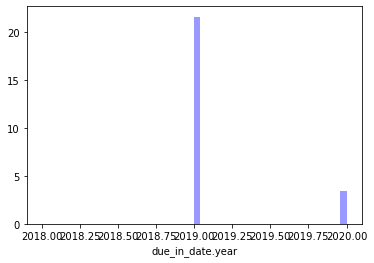

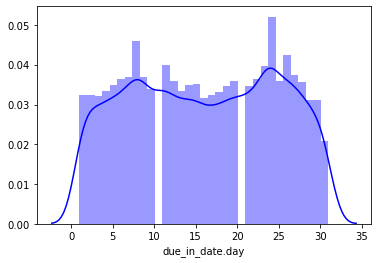

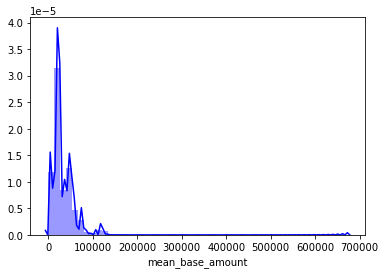

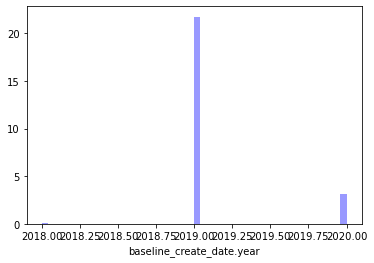

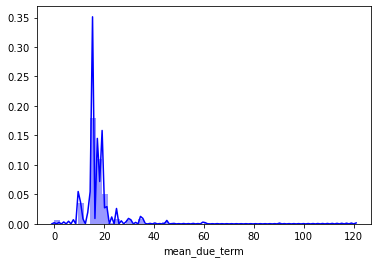

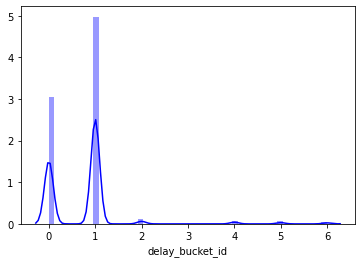

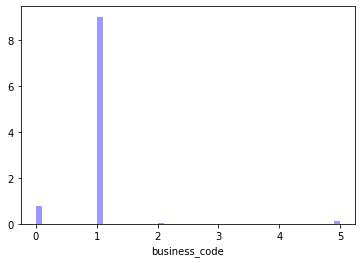

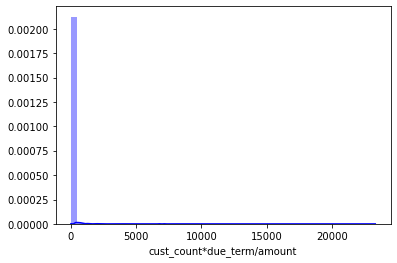

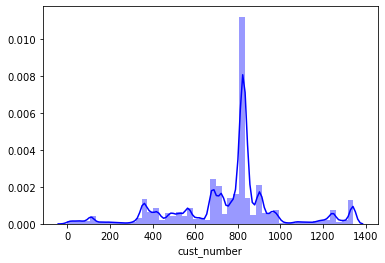

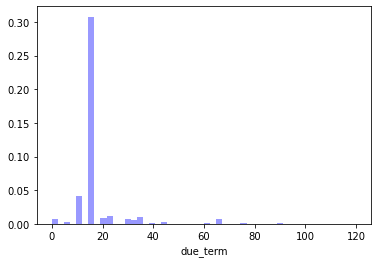

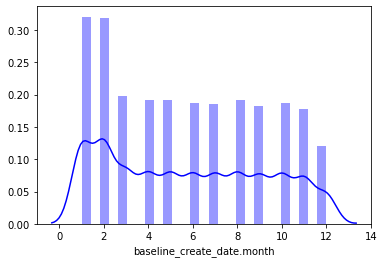

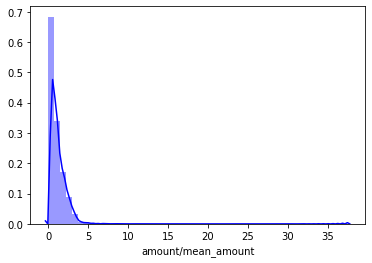

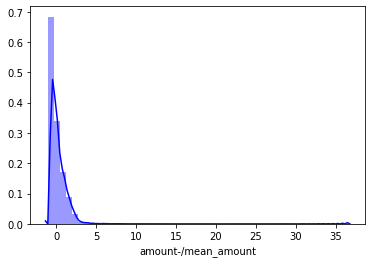

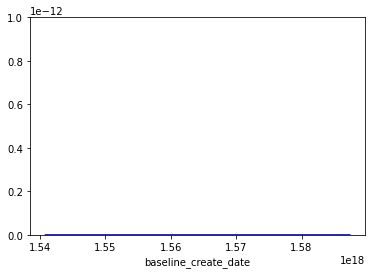

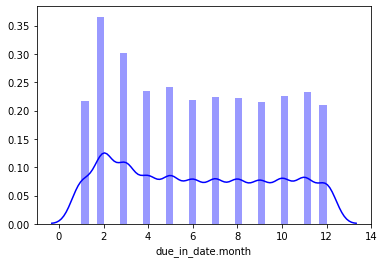

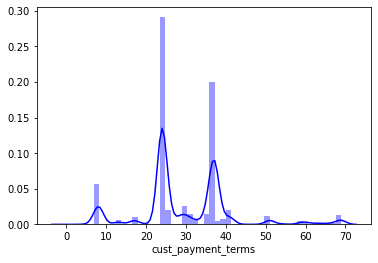

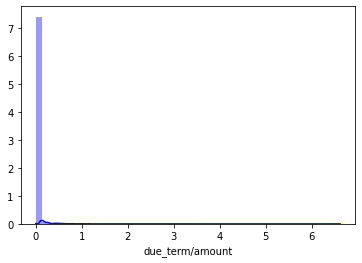

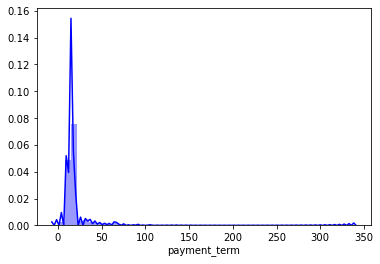

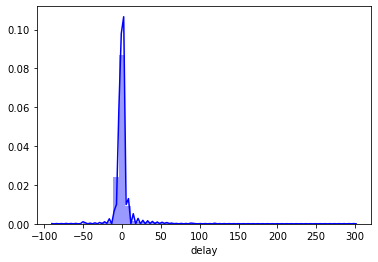

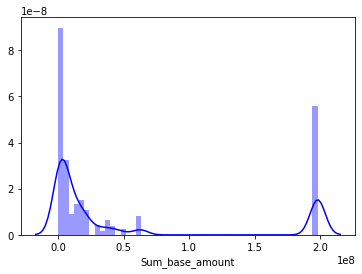

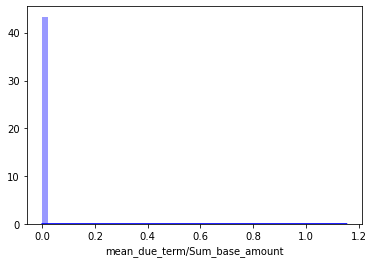

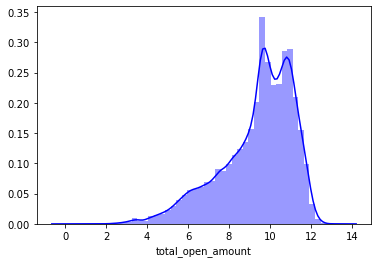

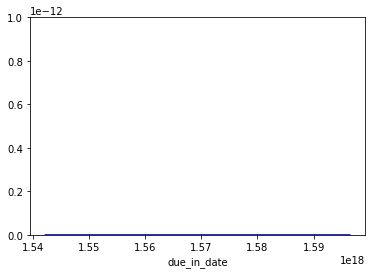

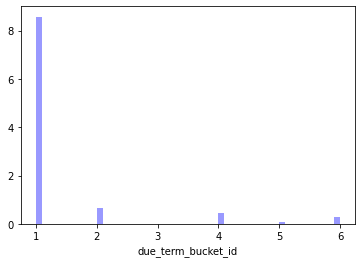

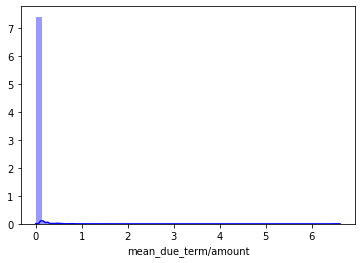

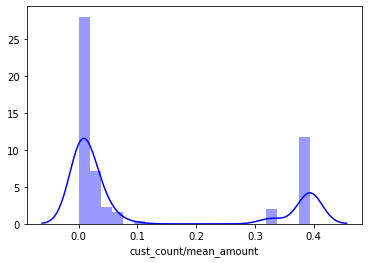

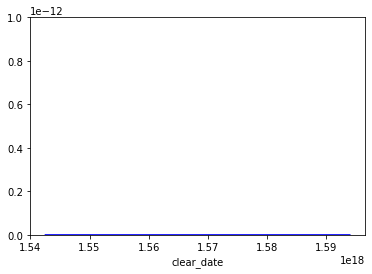

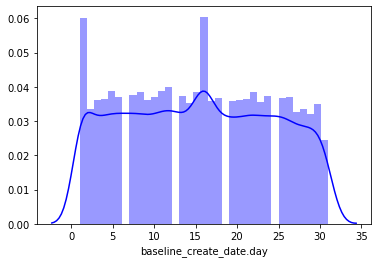

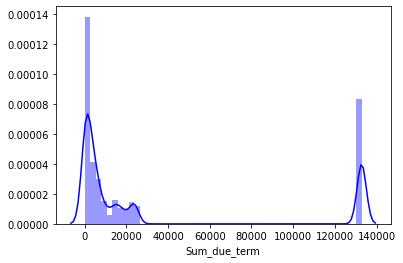

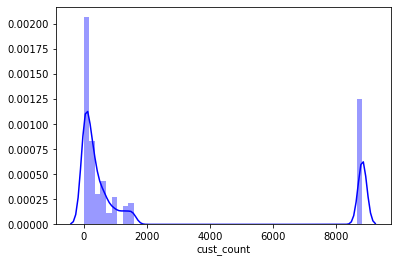

In [1006]:
for col in list(set(data.columns) - set(['DELAY BUCKET(DAYS)' ,'DUE TERM BUCKET(DAYS)'])):
    sns.distplot(data[col],color='blue')
    plt.show()

In [1007]:
data_copy = data.copy()
test_dataset_copy = test_dataset.copy()   #making a copy

In [1008]:
'''OUTLIER DETECTION AND REMOVAL
clear_date-due_in_date(Payment term) > 100

15 > total_open_amount > 1

-45 < delay <50

custumer_num >50'''

'OUTLIER DETECTION AND REMOVAL\nclear_date-due_in_date(Payment term) > 100\n\n15 > total_open_amount > 1\n\n-45 < delay <50\n\ncustumer_num >50'

In [1009]:
pay_max = 80   #assuming to be 80
data[data['payment_term']>=pay_max]['payment_term'].value_counts().sum()

330

In [1010]:
#Distribution after removing outliers

In [1011]:
data = data[(data['total_open_amount'] > 1) & (data['payment_term']<=pay_max )].reset_index(drop=True)

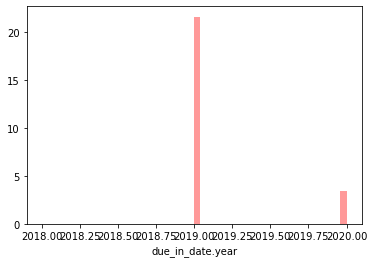

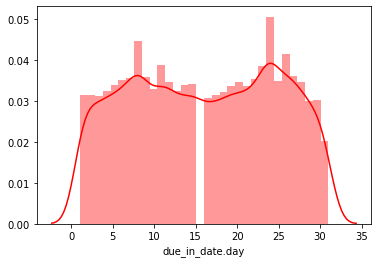

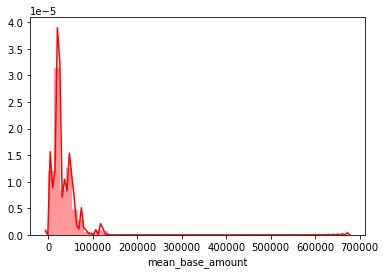

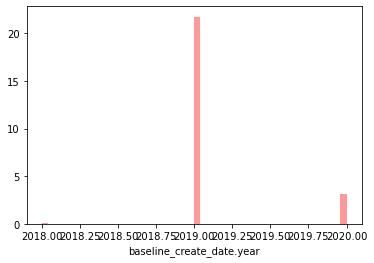

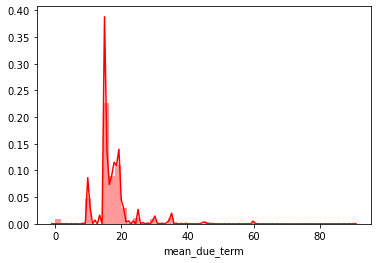

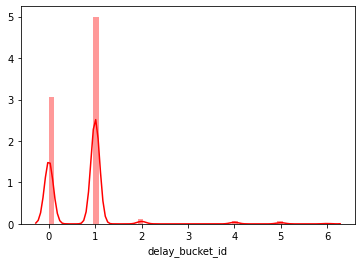

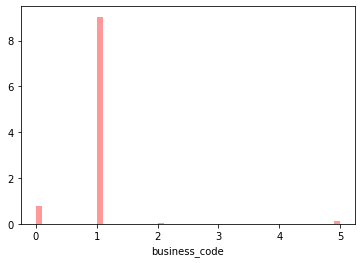

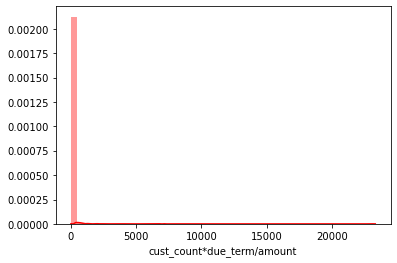

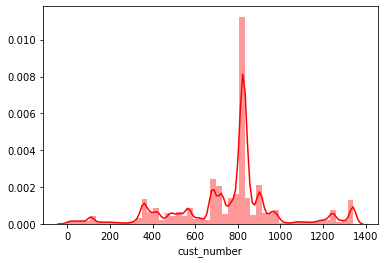

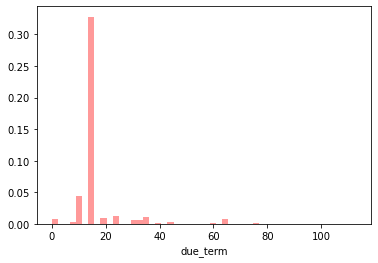

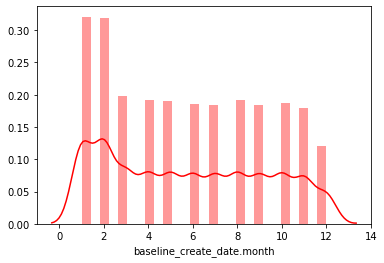

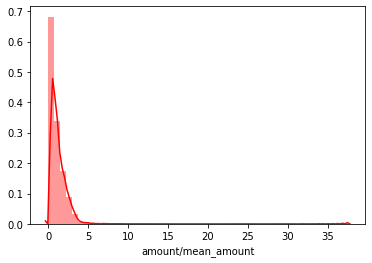

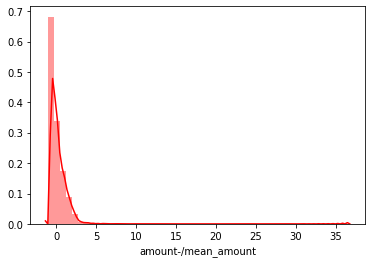

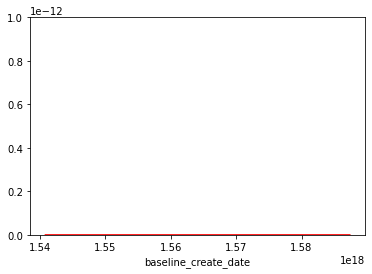

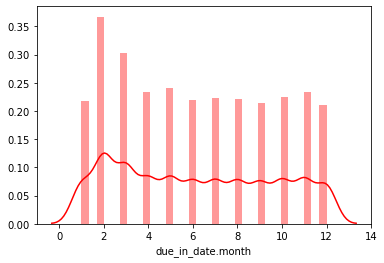

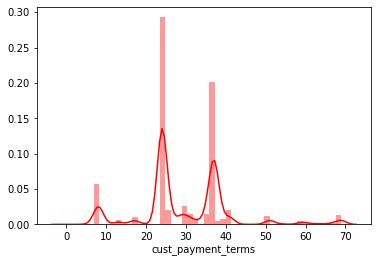

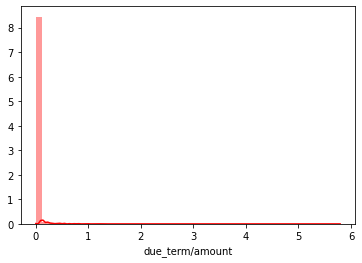

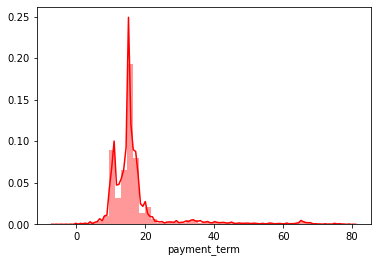

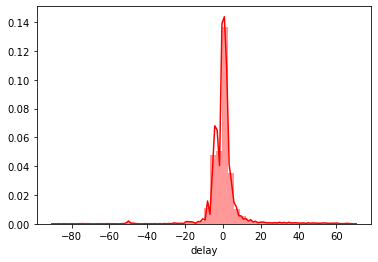

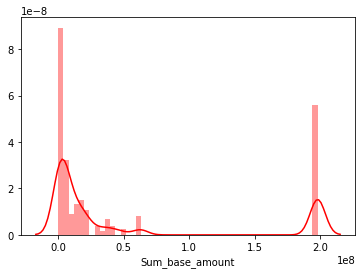

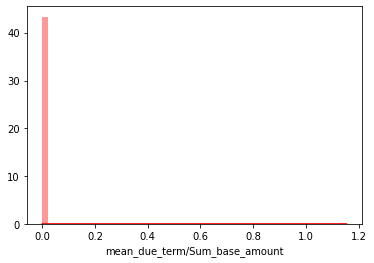

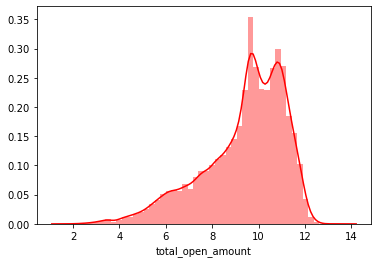

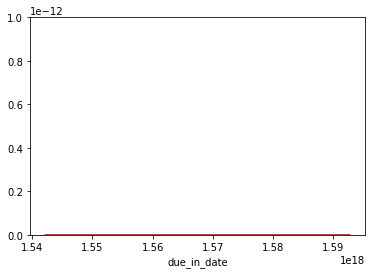

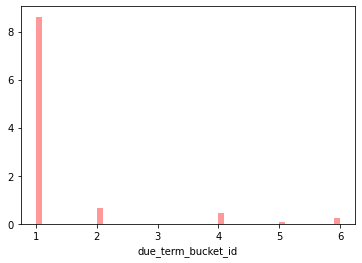

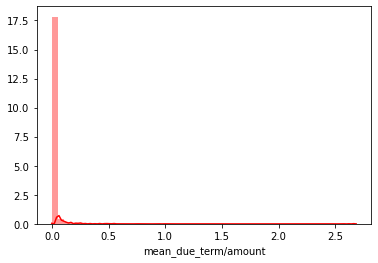

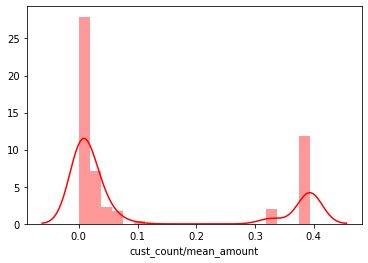

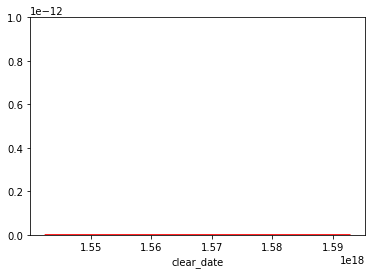

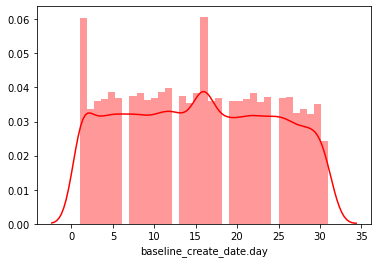

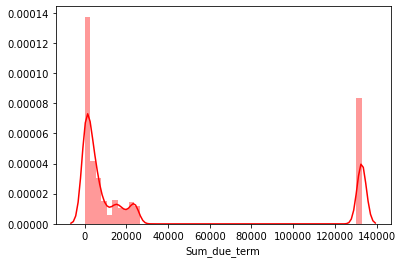

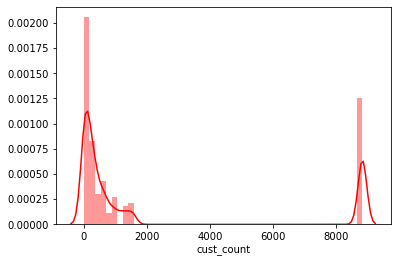

In [1012]:
for col in list(set(data.columns) - set(['DELAY BUCKET(DAYS)' ,'DUE TERM BUCKET(DAYS)'])):
    sns.distplot(data[col],color='red')
    plt.show()

In [1013]:
#coorelation matrix

d_corr=data.corr()
d_corr

,business_code,cust_number,total_open_amount,cust_payment_terms,payment_term,due_term,delay,delay_bucket_id,due_term_bucket_id,baseline_create_date.day,...,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_count,cust_count/mean_amount,cust_count*due_term/amount
business_code,1.000000,0.110220,-0.024012,0.509146,0.227248,0.312193,-0.064837,-0.046032,0.247301,-0.008753,...,-0.212856,0.482324,-0.000699,-0.000699,0.012287,0.014264,0.009724,0.025265,0.032473,0.005499
cust_number,0.110220,1.000000,0.013959,0.393416,0.133947,0.022264,0.133472,0.106431,0.042207,0.005939,...,-0.144466,0.023234,-0.000453,-0.000453,-0.026743,-0.026331,-0.001062,0.158398,0.146040,0.018258
total_open_amount,-0.024012,0.013959,1.000000,-0.119817,-0.025343,-0.072588,0.047323,0.019274,-0.073074,0.048073,...,0.442071,0.076687,0.556871,0.556871,-0.423258,-0.472009,-0.036947,-0.078987,-0.213633,-0.271619
cust_payment_terms,0.509146,0.393416,-0.119817,1.000000,0.254670,0.249278,0.034105,0.018091,0.239892,-0.041809,...,-0.316435,0.148664,-0.017675,-0.017675,0.066035,0.036151,-0.001170,0.369637,0.343620,0.055074
payment_term,0.227248,0.133947,-0.025343,0.254670,1.000000,0.603361,0.532453,0.549338,0.672487,-0.002667,...,-0.006620,0.388554,-0.048303,-0.048303,0.031705,-0.007352,0.008250,-0.253692,-0.252829,-0.025995
due_term,0.312193,0.022264,-0.072588,0.249278,0.603361,1.000000,-0.353763,-0.160049,0.938620,-0.016792,...,-0.011074,0.623324,-0.075615,-0.075615,0.138536,0.051716,0.014653,-0.115350,-0.124654,0.001928
delay,-0.064837,0.133472,0.047323,0.034105,0.532453,-0.353763,1.000000,0.814189,-0.207536,0.014696,...,0.003989,-0.205890,0.023607,0.023607,-0.109860,-0.063516,-0.005877,-0.175115,-0.164226,-0.032535
delay_bucket_id,-0.046032,0.106431,0.019274,0.018091,0.549338,-0.160049,0.814189,1.000000,-0.038159,0.022876,...,0.067558,-0.141727,0.001848,0.001848,-0.039845,-0.030265,-0.004387,-0.357491,-0.321831,-0.043685
due_term_bucket_id,0.247301,0.042207,-0.073074,0.239892,0.672487,0.938620,-0.207536,-0.038159,1.000000,-0.018787,...,-0.027097,0.565374,-0.063816,-0.063816,0.112825,0.037263,0.014880,-0.183324,-0.192108,-0.012793
baseline_create_date.day,-0.008753,0.005939,0.048073,-0.041809,-0.002667,-0.016792,0.014696,0.022876,-0.018787,1.000000,...,0.050308,-0.010012,0.009541,0.009541,-0.023894,-0.022994,0.004091,0.012042,0.007236,0.004688


In [1014]:
# covariance matrix

data.cov()

,business_code,cust_number,total_open_amount,cust_payment_terms,payment_term,due_term,delay,delay_bucket_id,due_term_bucket_id,baseline_create_date.day,...,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_count,cust_count/mean_amount,cust_count*due_term/amount
business_code,0.276699,1.455415e+01,-2.239116e-02,3.051712e+00,1.269589e+00,1.578430e+00,-3.088412e-01,-1.790817e-02,1.328535e-01,-4.066239e-02,...,-2.658755e+03,1.583050e+00,-4.435018e-04,-4.435018e-04,0.000517,0.000478,3.214409e-05,4.693082e+01,2.792170e-03,7.990437e-01
cust_number,14.554150,6.301539e+04,6.211610e+00,1.125313e+03,3.571207e+02,5.371770e+01,3.034030e+02,1.975978e+01,1.082071e+01,1.316511e+01,...,-8.611485e+05,3.639209e+01,-1.373513e-01,-1.373513e-01,-0.537420,-0.420747,-1.674819e-03,1.404126e+05,5.992606e+00,1.266083e+03
total_open_amount,-0.022391,6.211610e+00,3.142477e+00,-2.420205e+00,-4.771416e-01,-1.236798e+00,7.596564e-01,2.526889e-02,-1.322949e-01,7.525970e-01,...,1.860868e+04,8.482170e-01,1.191224e+00,1.191224e+00,-0.060064,-0.053262,-4.115777e-04,-4.944500e+02,-6.190506e-02,-1.330112e+02
cust_payment_terms,3.051712,1.125313e+03,-2.420205e+00,1.298360e+02,3.082011e+01,2.730107e+01,3.519042e+00,1.524587e-01,2.791625e+00,-4.207136e+00,...,-8.561891e+04,1.056952e+01,-2.430311e-01,-2.430311e-01,0.060234,0.026222,-8.378967e-05,1.487326e+04,6.400272e-01,1.733544e+02
payment_term,1.269589,3.571207e+02,-4.771416e-01,3.082011e+01,1.128026e+02,6.159352e+01,5.120904e+01,4.315071e+00,7.294363e+00,-2.501767e-01,...,-1.669698e+03,2.574916e+01,-6.190605e-01,-6.190605e-01,0.026956,-0.004971,5.506076e-04,-9.514799e+03,-4.389427e-01,-7.626678e+01
due_term,1.578430,5.371770e+01,-1.236798e+00,2.730107e+01,6.159352e+01,9.238402e+01,-3.079049e+01,-1.137731e+00,9.213662e+00,-1.425380e+00,...,-2.527391e+03,3.738217e+01,-8.770181e-01,-8.770181e-01,0.106594,0.031642,8.850176e-04,-3.915147e+03,-1.958511e-01,5.120048e+00
delay,-0.308841,3.034030e+02,7.596564e-01,3.519042e+00,5.120904e+01,-3.079049e+01,8.199954e+01,5.452802e+00,-1.919299e+00,1.175203e+00,...,8.576927e+02,-1.163301e+01,2.579576e-01,2.579576e-01,-0.079638,-0.036612,-3.344100e-04,-5.599652e+03,-2.430916e-01,-8.138682e+01
delay_bucket_id,-0.017908,1.975978e+01,2.526889e-02,1.524587e-01,4.315071e+00,-1.137731e+00,5.452802e+00,5.469878e-01,-2.882239e-02,1.494128e-01,...,1.186464e+03,-6.540222e-01,1.649719e-03,1.649719e-03,-0.002359,-0.001425,-2.039110e-05,-9.336557e+02,-3.890791e-02,-8.925107e+00
due_term_bucket_id,0.132853,1.082071e+01,-1.322949e-01,2.791625e+00,7.294363e+00,9.213662e+00,-1.919299e+00,-2.882239e-02,1.043008e+00,-1.694397e-01,...,-6.571347e+02,3.602731e+00,-7.864603e-02,-7.864603e-02,0.009224,0.002422,9.549678e-05,-6.611444e+02,-3.207087e-02,-3.609305e+00
baseline_create_date.day,-0.040662,1.316511e+01,7.525970e-01,-4.207136e+00,-2.501767e-01,-1.425380e+00,1.175203e+00,1.494128e-01,-1.694397e-01,7.799104e+01,...,1.054985e+04,-5.516811e-01,1.016795e-01,1.016795e-01,-0.016892,-0.012926,2.270182e-04,3.755388e+02,1.044530e-02,1.143675e+01


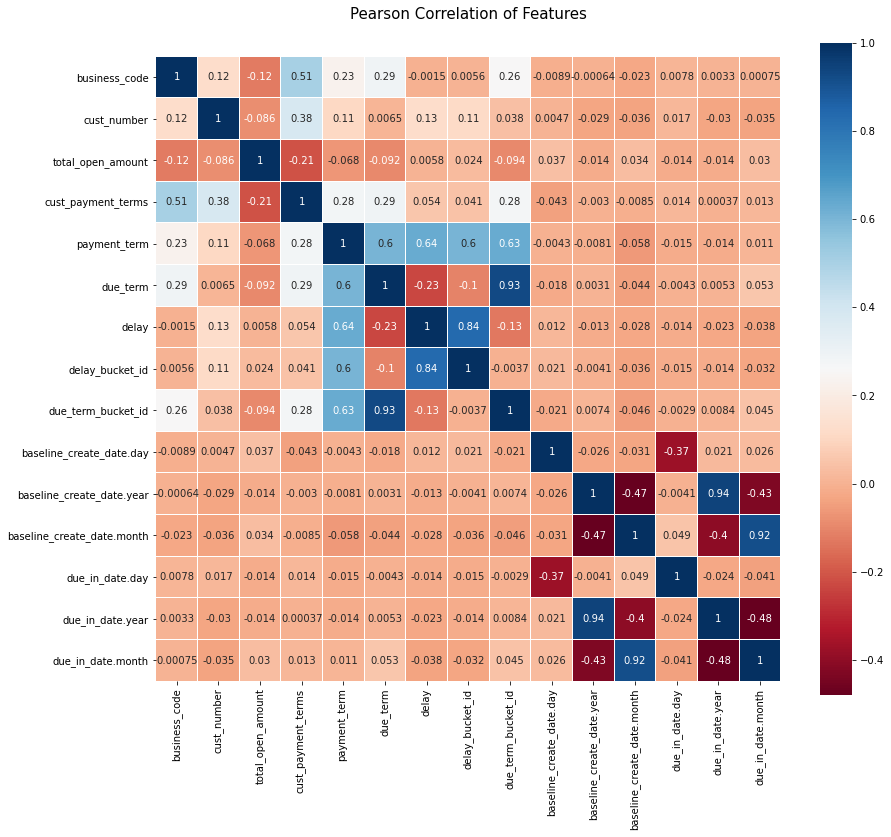

In [1015]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(bdf.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [1016]:
#diffrentitating categorical values, numerical values, 

In [1017]:
categorical_features = ['business_code', 'cust_payment_terms','due_term_bucket_id']

In [1018]:
numerical_features = list(set(set(data.columns) - set(['DELAY BUCKET(DAYS)', 'DUE TERM BUCKET(DAYS)', 'delay_bucket_id', 'due_term_bucket_id','clear_date', 'due_in_date', 'baseline_create_date'])) - set(categorical_features))

In [1019]:
infos_df = data[['clear_date', 'due_in_date', 'baseline_create_date','total_open_amount']]

In [1020]:
train_num = data[list(set(numerical_features)   -  set(['payment_term','delay']))]
test_num = test_dataset[list(set(numerical_features)   -  set(['payment_term','delay']))]
train_cat = data[categorical_features]
test_cat = test_dataset[list(set(categorical_features))]

In [1021]:
#Scaling the Numerical features  using minmax scaler

In [1022]:
scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
final_train_n = pd.DataFrame(scaler.fit_transform(train_num[list(set(numerical_features)-set(['payment_term','delay']))]),columns=list(set(numerical_features)-set(['payment_term','delay'])))
final_test_n = pd.DataFrame(scaler.fit_transform(test_num),columns=list(set(numerical_features)-set(['payment_term','delay'])))
data['delay'] = y_scaler.fit_transform(np.array(data['delay']).reshape(data['delay'].shape[0],1))

In [1023]:
num_cols = final_train_n.columns

In [1024]:
final_train_n=pd.merge(final_train_n,data['cust_number'],left_index=True,right_index=True)
final_test_n=pd.merge(final_test_n,test_dataset['cust_number'],left_index=True,right_index=True)

In [1025]:
final_test_n=pd.merge(final_test_n,infos_df.drop(columns = ['clear_date']),left_index=True,right_index=True)

In [1026]:
final_train_n=pd.merge(final_train_n,infos_df,left_index=True,right_index=True)

In [1027]:
data_cat=pd.concat((train_cat,test_cat),sort=False).reset_index(drop=True)
data_cat

,business_code,cust_payment_terms,due_term_bucket_id
0,1,33,2
1,1,40,1
2,0,8,1
3,1,33,2
4,1,37,1
...,...,...,...
49659,1,70,1
49660,0,10,1
49661,0,8,1
49662,1,13,1


In [1028]:
#creating dummy values for catagorical values
data_cat1 = pd.get_dummies(data_cat,prefix='dumm_a_',columns = ['business_code'],drop_first=False)
data_cat2 = pd.get_dummies(data_cat,prefix='dumm_b_',columns = ['cust_payment_terms'],drop_first=False)
data_cat1 = pd.merge(data_cat1,data_cat2,left_index=True,right_index=True)
data_cat2 = pd.get_dummies(data_cat,prefix='dumm_c_',columns = ['due_term_bucket_id'],drop_first=False)
data_cat1 = pd.merge(data_cat1,data_cat2,left_index=True,right_index=True)

data_cat1 = data_cat1.drop(columns =['cust_payment_terms_x', 'due_term_bucket_id_x','due_term_bucket_id_y','business_code_y','cust_payment_terms_y','business_code_x']) 

In [1029]:
data[['business_code','cust_payment_terms','due_term_bucket_id']].nunique().sum()

77

In [1030]:
final_train_c = data_cat1[:data.shape[0]].reset_index(drop=True)
final_test_c = data_cat1[data.shape[0]:].reset_index(drop=True)

In [1031]:
# merging all the values
#Merging the Numerical, Categorical and Numerical-Categorical Data

In [1032]:
test_data = final_test_n.merge(final_test_c.reset_index(drop=True),left_index=True,right_index=True)
test_data

,due_in_date.year,due_in_date.day,mean_base_amount,baseline_create_date.year,mean_due_term,Sum_base_amount,mean_due_term/Sum_base_amount,total_open_amount_x,mean_due_term/amount,cust_count/mean_amount,...,dumm_b__66,dumm_b__67,dumm_b__68,dumm_b__69,dumm_b__70,dumm_c__1,dumm_c__2,dumm_c__4,dumm_c__5,dumm_c__6
0,0.0,1.000000,0.177061,0.0,0.230769,0.004658,9.361994e-05,0.513690,0.001424,0.000772,...,0,0,0,0,0,1,0,0,0,0
1,0.0,0.500000,0.177061,0.0,0.230769,0.004658,9.361994e-05,0.387372,0.007134,0.000772,...,0,0,0,0,0,1,0,0,0,0
2,0.0,0.400000,0.092777,0.0,0.245658,0.054082,8.584440e-06,0.785886,0.000047,0.002317,...,0,0,0,0,0,1,0,0,0,0
3,0.0,0.400000,0.103194,0.0,0.232262,1.000000,4.389532e-07,0.782523,0.000046,0.001382,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0.400000,0.137257,0.0,0.260295,0.051083,9.629992e-06,0.614982,0.000441,0.001688,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.466667,0.031609,0.0,0.000000,0.000715,0.000000e+00,0.526491,0.000000,0.003082,...,0,0,0,0,1,1,0,0,0,0
9996,0.0,0.500000,0.006921,0.0,0.000000,0.000026,0.000000e+00,0.562658,0.000000,0.002013,...,0,0,0,0,0,1,0,0,0,0
9997,0.0,0.933333,0.137257,0.0,0.260295,0.051083,9.629992e-06,0.706903,0.000090,0.001688,...,0,0,0,0,0,1,0,0,0,0
9998,0.0,0.933333,0.137257,0.0,0.260295,0.051083,9.629992e-06,0.495788,0.002018,0.001688,...,0,0,0,0,0,1,0,0,0,0


In [1033]:
train_data = final_train_n.merge(final_train_c.reset_index(drop=True),left_index=True,right_index=True)
train_data = train_data.merge(data['delay'].reset_index(drop=True),left_index=True,right_index=True)
train_data

,due_in_date.year,due_in_date.day,mean_base_amount,baseline_create_date.year,mean_due_term,Sum_base_amount,mean_due_term/Sum_base_amount,total_open_amount_x,mean_due_term/amount,cust_count/mean_amount,...,dumm_b__67,dumm_b__68,dumm_b__69,dumm_b__70,dumm_c__1,dumm_c__2,dumm_c__4,dumm_c__5,dumm_c__6,delay
0,0.5,0.400000,0.065871,0.0,0.333333,0.019197,6.837741e-06,0.527143,0.003870,0.004925,...,0,0,0,0,0,1,0,0,0,0.594937
1,0.0,1.000000,0.023799,0.0,0.166667,0.001049,6.255623e-05,0.367504,0.012773,0.002050,...,0,0,0,0,1,0,0,0,0,0.784810
2,0.5,0.200000,0.050311,0.0,0.111111,0.057803,7.569496e-07,0.374885,0.005120,0.025479,...,0,0,0,0,1,0,0,0,0,0.841772
3,0.5,0.866667,0.065871,0.0,0.333333,0.019197,6.837741e-06,0.536975,0.003445,0.004925,...,0,0,0,0,0,1,0,0,0,0.708861
4,0.5,0.433333,0.033403,0.0,0.167069,1.000000,6.578975e-08,0.330670,0.019790,1.000000,...,0,0,0,0,1,0,0,0,0,0.531646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39659,1.0,0.400000,0.043023,1.0,0.111111,0.013416,3.261409e-06,0.481341,0.001454,0.008075,...,0,0,0,0,1,0,0,0,0,0.917722
39660,1.0,0.433333,0.046614,1.0,0.111111,0.042499,1.029539e-06,0.779471,0.000043,0.021818,...,0,0,0,0,1,0,0,0,0,0.594937
39661,1.0,0.500000,0.008415,1.0,0.111111,0.001201,3.643645e-05,0.115763,0.109566,0.018821,...,0,0,0,0,1,0,0,0,0,0.563291
39662,1.0,0.500000,0.008415,1.0,0.111111,0.001201,3.643645e-05,0.115763,0.109566,0.018821,...,0,0,0,0,1,0,0,0,0,0.563291


In [1034]:
set(train_data.columns) - set(test_data.columns)

{'clear_date', 'delay'}

In [1035]:
#GENERATING THE TEST-TRAIN-EVALUATION DATA

In [1036]:
train_data = train_data.copy()
data_copy = data.copy()

In [1037]:
x_data = train_data[set(train_data.columns) - set(['delay'])]
x_data.shape

(39664, 104)

In [1038]:
x_test = test_data[set(test_data.columns) - set(['delay'])]
x_test.shape

(10000, 103)

In [1039]:
y_data = train_data['delay']
y_data.shape

(39664,)

In [1040]:
eval_range = (math.ceil(data.shape[0]*(0.25)))+1   #dividing to 35:65 for eval and train
x_train,x_eval,y_train,y_eval = x_data[eval_range:].reset_index(drop=True),x_data[0:eval_range].reset_index(drop=True),y_data[eval_range:].reset_index(drop=True),y_data[0:eval_range].reset_index(drop=True) 

In [1041]:
eval_range = (math.ceil(x_eval.shape[0]*(0.4)))+1   #dividing 50 and 50 to eval1 and eval2 evaluation data set
x_eval1,x_eval2,y_eval1,y_eval2 = x_eval[eval_range:].reset_index(drop=True),x_eval[0:eval_range].reset_index(drop=True),y_eval[eval_range:].reset_index(drop=True),y_eval[0:eval_range].reset_index(drop=True)

In [1042]:
x_train_info = x_train[['clear_date','total_open_amount_y','cust_number_y','baseline_create_date','due_in_date']]
x_eval1_info = x_eval1[['clear_date','total_open_amount_y','cust_number_y','baseline_create_date','due_in_date']]
x_eval2_info = x_eval2[['clear_date','total_open_amount_y','cust_number_y','baseline_create_date','due_in_date']]
x_test_info = x_test[['total_open_amount_y','cust_number_y','baseline_create_date','due_in_date']]
 
#final dataset    
x_train = x_train.drop(columns=['clear_date','baseline_create_date','due_in_date'])
x_eval1 = x_eval1.drop(columns=['clear_date','baseline_create_date','due_in_date'])
x_eval2 = x_eval2.drop(columns=['clear_date','baseline_create_date','due_in_date'])
x_test = x_test.drop(columns=['baseline_create_date','due_in_date'])

In [1043]:
#FEATURE SELECTION

#finding the best model that has high accuracy

In [1044]:
def select_features(x_train,y_train,x_test,x_eval1,x_eval2):
    fs = SelectKBest(score_func = f_regression,k=10)
    fs.fit(x_train,y_train)
    col_indices = fs.get_support(indices=True)
    x_features = x_train.columns[col_indices]
    x_train_fs = pd.DataFrame(fs.transform(x_train),columns=x_features)
    x_test_fs = pd.DataFrame(fs.transform(x_test),columns=x_features)
    x_eval1_fs = pd.DataFrame(fs.transform(x_eval1),columns=x_features)
    x_eval2_fs = pd.DataFrame(fs.transform(x_eval2),columns=x_features)
    return x_train_fs,x_test_fs,x_eval1_fs,x_eval2_fs,fs,x_features,col_indices

In [1045]:
model1 = LinearRegression()
parameters = {'fit_intercept':[True,False],'n_jobs':[1,2,3],'normalize':[True,False]}
grid = GridSearchCV(estimator = model1,param_grid= parameters,scoring = 'neg_mean_squared_error',verbose = 1)     
grid_results = grid.fit(x_train,y_train)
print('BEST SCORE:  ',grid_results.best_score_)
print('BEST PARAMS:  ',grid_results.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


BEST SCORE:   -0.0017930440246572727
BEST PARAMS:   {'fit_intercept': False, 'n_jobs': 1, 'normalize': True}


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.8s finished


In [1046]:
#MODEL TRAINING , PREDICTION AND EVALUATION

In [1048]:

metric_names = ["SCORE","ROOT MEAN SQUARED ERROR"]

reg_metrics = []

In [1049]:
#1. LINEAR REGRESSION

In [1050]:
model1 = LinearRegression(fit_intercept = grid_results.best_params_['fit_intercept'],n_jobs = grid_results.best_params_['n_jobs'])
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_eval1)
y_pred1 = y_pred1.reshape(y_pred1.shape[0])
y_eval1 = np.array(y_eval1)
y_predicted = y_scaler.inverse_transform(y_pred1.reshape(y_pred1.shape[0],1)).reshape(y_pred1.shape[0])
y_true = y_scaler.inverse_transform(y_eval1.reshape(y_eval1.shape[0],1)).reshape(y_eval1.shape[0])
root_mean_sq_error=mean_squared_error(y_eval1,y_pred1)**0.5
scr = model1.score(x_eval1,y_eval1)
reg_metrics.append([scr,root_mean_sq_error])

print("METRICS  :\nScore :   ",scr,"\nRoot Mean Squared Error :  ",root_mean_sq_error)   

METRICS  :
Score :    0.45489095981113725 
Root Mean Squared Error :   0.04918507921533527


In [1052]:
#2. REGULARIZATION AND EVALUATION : RIDGE REGRESSION

In [1053]:
ridge = Ridge()
parameters = {'alpha':[x for x in [0.0005,0.0001,0.00021,0.0006,0.1,0.001,0.005,0.008,0.1,0.5,1,0.1,0.09,0.08,0.06,0.05,0.03,0.01,0.02,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]]}  

ridge_reg = GridSearchCV(ridge,param_grid = parameters,verbose=1)
ridge_reg = ridge_reg.fit(x_train,y_train)

alpha = ridge_reg.best_params_['alpha']



ridge_mod = Ridge(alpha=alpha)
ridge_mod=ridge_mod.fit(x_train,y_train)
y_pred1 = ridge_mod.predict(x_eval1)
y_pred2 = ridge_mod.predict(x_eval2)

root_mean_sq_error=mean_squared_error(y_eval1,y_pred1)**0.5
scr = ridge_mod.score(x_eval1,y_eval1)
print("METRICS  :\nScore :   ",scr,"\nRoot Mean Squared Error :  ",root_mean_sq_error) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


METRICS  :
Score :    0.46520991502782105 
Root Mean Squared Error :   0.0487173163135189


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    7.4s finished


In [1054]:
reg_metrics.append([scr,root_mean_sq_error])

In [1055]:
#3. RANDOM FOREST REGRESSOR

In [1056]:
rfr = RandomForestRegressor(max_depth=10,n_estimators=500,random_state=False,verbose=True) 

rfr.fit(x_train,y_train)

y_pred1 = rfr.predict(x_eval1)

scr = rfr.score(x_eval1,y_eval1)
root_mean_sq_error=mean_squared_error(y_eval1,y_pred1)**0.5
reg_metrics.append([scr,root_mean_sq_error])

print("METRICS  :\nScore :   ",scr,"\nRoot Mean Squared Error :  ",root_mean_sq_error) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


METRICS  :
Score :    0.6365225106565882 
Root Mean Squared Error :   0.04016339742694905


In [1057]:
# Evaluating in with the 2nd evaluation data

y_pred2 = rfr.predict(x_eval2)

scr = rfr.score(x_eval2,y_eval2)
root_mean_sq_error=mean_squared_error(np.array(y_eval2).reshape(np.array(y_eval2).shape[0],1),y_pred2)**0.5
print("METRICS  :\nScore :   ",scr,"\nRoot Mean Squared Error :  ",root_mean_sq_error) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


METRICS  :
Score :    0.6710320258821887 
Root Mean Squared Error :   0.03188632529441189


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


In [1058]:
cols = list(set(x_train.columns) - set(['cust_payment_terms', 'business_code']) )

In [1059]:
#Comparision between METRICS

In [1060]:
regression_algo = ['1. LINEAR REGRESSION','2. RIDGE REGRESSION','3. RANDOM FOREST REGRESSION'] 

metric_names = ["SCORE","ROOT MEAN SQUARED ERROR"]

In [1061]:
comp_metrics = pd.DataFrame(reg_metrics,columns= metric_names, index = regression_algo)

In [1062]:
comp_metrics

,SCORE,ROOT MEAN SQUARED ERROR
1. LINEAR REGRESSION,0.454891,0.049185
2. RIDGE REGRESSION,0.465210,0.048717
3. RANDOM FOREST REGRESSION,0.636523,0.040163


In [1063]:
output = pd.DataFrame(columns=['INVOICE CREATE DATE','AMOUNT(IN USD)','INVOICE DUE DATE','INVOICE PAYMENT TERM','INVOICE PAYMENT DATE','DELAY','BUCKET ID'])

In [1064]:
#COMPUTATION OF OUR ESTIMATED PAYMENT DATE  using the best model a.k.a higher accuracy 

In [1065]:
output['INVOICE CREATE DATE'] = x_test_info['baseline_create_date']
output['INVOICE DUE DATE'] = x_test_info['due_in_date']
output['AMOUNT(IN USD)'] = x_test_info['total_open_amount_y'].apply(np.exp)

In [1066]:
x_test = x_test.dropna()
y_pred = model1.predict(x_test)
y_pred = y_scaler.inverse_transform(np.array(y_pred).reshape(np.array(y_pred).shape[0],1)).reshape(np.array(y_pred).shape[0])
y_pred = np.ceil(np.array(y_pred))

In [1067]:
x_test.shape

(10000, 101)

In [1068]:
y_pred.shape

(10000,)

In [1069]:
y_pred

array([36., 45., 19., ..., 55., 52., 50.])

In [1070]:
output.shape

(10000, 7)

In [1071]:
output['INVOICE PAYMENT TERM'] =y_pred

In [1072]:
output['INVOICE PAYMENT TERM'] = pd.Series(output['INVOICE PAYMENT TERM']).map(lambda x: str(int(x)) )

In [1073]:
output['INVOICE PAYMENT TERM']=output['INVOICE PAYMENT TERM'].str[0:2]  #selecting first 2 digits as whole date was converted 

In [1074]:
output['INVOICE PAYMENT TERM'] = pd.Series(output['INVOICE PAYMENT TERM']).map(lambda x: (int(x)) )

In [1075]:
output['INVOICE PAYMENT DATE'] = output['INVOICE CREATE DATE'] + pd.to_timedelta(np.ceil(output['INVOICE PAYMENT TERM']),'D')

In [1076]:
output['DELAY'] = pd.Series(output['INVOICE PAYMENT DATE'] - output['INVOICE DUE DATE']).dt.days

In [1077]:
out=output

In [1078]:
def bucket_range(x):
    if x<0:
        return('(< 0) Days')
    if x in range(0,16):
        return('(0-15) Days')
    elif x in range(16,31):
        return('(16-30) Days')
    elif x in range(31,45):
        return('(31-45) Days')
    elif x in range(45,60):
        return('(45-60) Days')
    else:
        return('(> 60) Days')

In [1079]:
out = out.reset_index(drop=True)

out['BUCKET RANGE']= pd.Series([bucket_range(x=out['DELAY'][i])  for i in range(len(out))])
bucket_id_mapper = {'(< 0) Days':0,'(0-15) Days':1,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}

out['BUCKET ID'] = out['BUCKET RANGE'].map(bucket_id_mapper)

In [1080]:
out.drop(columns=['BUCKET RANGE'],inplace=True)

In [1081]:
tt=test[['cust_number','name_customer','baseline_create_date','due_in_date','total_open_amount']]

In [1082]:
tt['payment_term'] = out['INVOICE PAYMENT TERM']

In [1083]:
tt['clear_date'] = tt['baseline_create_date'] + pd.to_timedelta(np.ceil(tt['payment_term']),'D')

In [1084]:
tt['delay'] = pd.Series(tt['clear_date'] - tt['due_in_date']).dt.days

In [1085]:
tt  #negative delay shows cust paid before due date

,cust_number,name_customer,baseline_create_date,due_in_date,total_open_amount,payment_term,clear_date,delay
0,772,TARG associates,2020-03-25,2020-04-09,28228.92,36,2020-04-30,21
1,827,WAL-MAR co,2020-04-24,2020-05-09,3916.36,45,2020-06-08,30
2,827,WAL-MAR trust,2020-02-28,2020-03-14,47072.85,19,2020-03-18,4
3,811,C&S WH,2020-04-02,2020-04-17,54441.07,17,2020-04-19,2
4,827,WAL-MAR us,2020-03-29,2020-04-13,661.11,20,2020-04-18,5
...,...,...,...,...,...,...,...,...
9995,901,COST co,2020-05-03,2020-05-18,33953.74,30,2020-06-02,15
9996,723,BJ'S,2020-04-15,2020-04-30,784.28,38,2020-05-23,23
9997,901,COST corporation,2020-03-12,2020-03-27,16805.44,55,2020-05-06,40
9998,913,UNITE foundation,2020-04-23,2020-05-08,68638.11,52,2020-06-14,37


In [1086]:
bdf['delay'] = bdf['payment_term'] - bdf['due_term']  

In [1087]:
bdf1.index=bdf.index

In [1088]:
bdf['name_customer']=bdf1['name_customer']

In [1089]:
tr=bdf[['cust_number','name_customer','baseline_create_date','due_in_date','total_open_amount','payment_term','clear_date','delay']]

In [1091]:
tr

,cust_number,name_customer,baseline_create_date,due_in_date,total_open_amount,payment_term,clear_date,delay
0,499,DECA foundation,2020-02-16,2020-03-10,824.52,15,2020-03-02,-8
1,880,ROU corporation,2019-08-19,2019-10-23,2855.14,65,2019-10-23,0
2,114,CAPITAL co,2019-03-14,2019-03-24,7466.94,14,2019-03-28,4
3,827,WAL-MAR trust,2020-01-19,2020-02-03,1322.22,11,2020-01-30,-4
4,1342,KRAFT F,2019-06-19,2019-06-19,9410.00,44,2019-08-02,44
...,...,...,...,...,...,...,...,...
39990,530,DECA associates,2019-12-01,2019-12-08,5966.67,9,2019-12-10,2
39991,393,THE associates,2020-01-31,2020-02-10,9000.72,68,2020-04-08,58
39992,214,CORPORACI llc,2019-01-31,2019-01-31,14321.00,4,2019-02-04,4
39993,723,BJ'S llc,2019-05-16,2019-05-31,575.59,15,2019-05-31,0


In [1092]:
result=pd.concat([tr,tt],axis=0)

In [1093]:
result  #final table 

,cust_number,name_customer,baseline_create_date,due_in_date,total_open_amount,payment_term,clear_date,delay
0,499,DECA foundation,2020-02-16,2020-03-10,824.52,15,2020-03-02,-8
1,880,ROU corporation,2019-08-19,2019-10-23,2855.14,65,2019-10-23,0
2,114,CAPITAL co,2019-03-14,2019-03-24,7466.94,14,2019-03-28,4
3,827,WAL-MAR trust,2020-01-19,2020-02-03,1322.22,11,2020-01-30,-4
4,1342,KRAFT F,2019-06-19,2019-06-19,9410.00,44,2019-08-02,44
...,...,...,...,...,...,...,...,...
9995,901,COST co,2020-05-03,2020-05-18,33953.74,30,2020-06-02,15
9996,723,BJ'S,2020-04-15,2020-04-30,784.28,38,2020-05-23,23
9997,901,COST corporation,2020-03-12,2020-03-27,16805.44,55,2020-05-06,40
9998,913,UNITE foundation,2020-04-23,2020-05-08,68638.11,52,2020-06-14,37
